<a href="https://colab.research.google.com/github/sbbzplt/QWorld-Silver/blob/master/silver/D04_Order_Finding_Algorithm_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qsoftware.lu.lv/index.php/qworld/" target="_blank"><img src="https://github.com/sbbzplt/QWorld-Silver/blob/master/images/qworld.jpg?raw=1" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$\newcommand{\Mod}[1]{\ (\mathrm{mod}\ #1)}$
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

In [1]:
try:
    import cirq
except:
    print("Cirq is being installed...")
    !pip install -q -U cirq
    import cirq
finally:
    print("Cirq is imported.")
!wget -q https://raw.githubusercontent.com/sbbzplt/QWorld-Silver/refs/heads/master/silver/operator.py
!wget -q https://gitlab.com/qworld/silver/-/raw/master/include/helpers.py


Cirq is being installed...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 43.1 MB/s eta 0:00:00
Cirq is imported.


<h1> <font color="blue"> Solutions for </font> Order Finding Algorithm</h1>

<a id="task1"></a>
<h3>Task 1</h3>

Let $x=5$ and $N=21$. Plot $x^ i \Mod{N}$ for $i$ values between $1$ and $50$ and find the order of $x$.

<h3>Solution</h3>

In [ ]:
import matplotlib.pyplot as plt
#Create an empty list
l = []
x=5
N=21

#Append x^i mod N values
for i in range (50):
    l.append((x**i) % N)


plt.plot(l)
plt.show()

Let's check each integer and stop when we find an integer $r$ satisfying $x^r = 1 \Mod{N}$

$ 5^1 = 5 ~\mod 21 $

$ 5^2 = 4 ~\mod 21  $

$ 5^3 = 20 \mod 21 $

$ 5^4 = 16 \mod 21 $

$ 5^5 = 17 \mod 21 $

$ 5^6 = 1 ~\mod 21  $

Hence the order $r$ is equal to 6.

<a id="task2"></a>
<h3>Task 2 (on paper)</h3>

Let $\ket{\psi_0}=\ket{1 \Mod{N}}+\ket{x\Mod{N}}+\ket{x^2\Mod{N}}+ \cdots + \ket{x^{r-1}\Mod{N}}$.

What is $U_x \ket{\psi_0}$? What can you conclude about $\ket{\psi_0}$?

Repeat the same task for $\ket{\psi_1}=\ket{1 \Mod{N}}+ \omega^{-1}\ket{x\Mod{N}}+\omega^{-2}\ket{x^2\Mod{N}}+ \cdots + \omega^{-(r-1)}  \ket{x^{r-1}\Mod{N}}$ where $\omega=e^{-\frac{2{\pi}i}{r}}$.

<h3>Solution</h3>

\begin{align*}
U_x\ket{\psi_0} &= U_x\ket{1 \Mod{N}} + U_x \ket{x \Mod{N}}+ \dots + U_x \ket{x^{r-1} \Mod{N}}\\
&= \ket{x \Mod{N}} + \ket{x^2\Mod{N}}+ \dots + \ket{1\Mod{N}} \\
&= \ket{\psi_0}
\end{align*}

Hence we can conclude that $\ket{\psi_0}$ is an eigenvector of the operator $U_x$ with eigenvalue 1.

Let's repeat the same for $\ket{\psi_1}$.

\begin{align*}
U_x\ket{\psi_1} &= U_x\ket{1 \Mod{N}} + \omega^{-1}U_x  \ket{x \Mod{N}}+ \dots +\omega^{-(r-1)} U_x \ket{x^{r-1} \Mod{N}}\\
&= \ket{x \Mod{N}} + \omega^{-1}\ket{x^2 \Mod{N}}+ \dots + \omega^{-(r-1)}\ket{1 \Mod{N}} \\
&= \omega( \omega^{-1}\ket{x \Mod{N}} + \omega^{-2}\ket{x^2 \Mod{N}}+ \dots + \omega^{-(r)}\ket{1 \Mod{N}}) \\
&= \omega\ket{\psi_1}
\end{align*}

Hence, $\ket{\psi_1}$ is an eigenvector of the operator $U_x$ with an eigenvalue $\omega$.

<a id="task3"></a>
<h3>Task 3 (on paper)</h3>

Show that $\displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}= \ket{1}$.

<h3>Solution</h3>

Let's replace $\ket{u_s}$ in the sum above. We have the following expression:

$ \displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}= \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\frac{1}{\sqrt{r}}\sum_{k=0}^{r-1}e^{\frac{-2{\pi}i s k}{r}}\ket{{x^k} \Mod{N}}$

If $ k=0 $, $ \displaystyle \sum_{s=0}^{r-1}e^{\frac{-2{\pi}i s k}{r}} = r $ and the state $ \ket{1} $ has amplitude 1 in which case for all other $ k $, all amplitudes are equal to 0. Hence $ \displaystyle \frac{1}{\sqrt{r}}\sum_{s=0}^{r-1}\ket{u_s}=\ket{1}.$


<a id="task4"></a>

<h3>Task 4</h3>

Find the continued fractions expression for $\frac{31}{13}$ and find the convergents first using pen and paper and then using the functions defined above.

<h3>Solution</h3>

$\frac{31}{13}$  can be expressed as $\frac{31}{13}=2+\frac{5}{13}$. Continuing like this,

\begin{align*}
		=2+\frac{1}{2+\frac{3}{5}} = 2+\frac{1}{2+\frac{1}{\frac{5}{3}}}
		\end{align*}
        
        

The resulting expression will be

\begin{align*}
2+\frac{1}{2+\frac{1}{1 + \frac{1}{1+ \frac{1}{2}}}}
\end{align*}

with the continued fraction expression $[2,2,1,1,2]$.


The convergents are $c_1=2$, $c_2=2 + \frac{1}{2} = \frac{5}{2} $, $c_3 = 2 + \frac{1}{2 + \frac{1}{1}} = \frac{7}{3}$, $c_4 = 2+ \frac{ 1}{2 + \frac{1}{1 + \frac{1}{1}}} = \frac{12}{5}$, $c_5 = 2+\frac{1}{2+\frac{1}{1 + \frac{1}{1+ \frac{1}{2}}}}
 = \frac{31}{13}$

Let's find the continued fractions expression and convergents for $\frac{31}{13}$ using the functions defined in the notebook.

In [2]:
%run helpers.py

In [3]:
cf=contFrac(31/13)
print(cf)
cv=convergents(cf)
print(cv)

[2, 2, 1, 1, 2]
[Fraction(2, 1), Fraction(5, 2), Fraction(7, 3), Fraction(12, 5), Fraction(31, 13)]


<a id="task5"></a>

<h3>Task 5</h3>

You are given a function named $U_x$ which implements $ U_x \ket{y} \rightarrow \ket{xy {\Mod{N}}}$ and returns its controlled version. Run the following cell to load the function.

In [4]:
%run operator.py

In order to use the function you should pass $x$ and $N$ as parameter.

<pre>CU=Ux(x,N)</pre>

Let $x=3$ and $N=20$. Use phase estimation procedure to find the estimates for $\frac{s}{r}$. Pick the correct values for $t$ and $L$. You can use the <i>qpe</i> function you have already implemented. Plot your results using a histogram. Where do the peaks occur?

<h3>Solution</h3>

In [5]:
# %load qpe.py
import cirq
def qpe(t,control, target, circuit, CU):

    #Apply Hadamard to control qubits
    circuit.append(cirq.H.on_each(control))

    #Apply CU gates
    for i in range(t):
        #Obtain the power of CU gate
        CUi = CU**(2**i)
        #Apply CUi gate where t-i-1 is the control
        circuit.append(CUi(control[t-i-1],*target))

    #Apply inverse QFT
    iqft(t,control,circuit)


In [6]:
# %load iqft.py
import cirq
from cirq.circuits import InsertStrategy
from cirq import H, SWAP, CZPowGate

def iqft(n,qubits,circuit):

    #Swap the qubits
    for i in range(n//2):
        circuit.append(SWAP(qubits[i],qubits[n-i-1]), strategy = InsertStrategy.NEW)

    #For each qubit
    for i in range(n-1,-1,-1):
        #Apply CR_k gates where j is the control and i is the target
        k=n-i #We start with k=n-i
        for j in range(n-1,i,-1):
            #Define and apply CR_k gate
            crk = CZPowGate(exponent = -2/2**(k))
            circuit.append(crk(qubits[j],qubits[i]),strategy = InsertStrategy.NEW)
            k=k-1 #Decrement at each step

        #Apply Hadamard to the qubit
        circuit.append(H(qubits[i]),strategy = InsertStrategy.NEW)


$t$ should be picked as $2L + 1 + \big \lceil \log \big( 2 + \frac{1}{2\epsilon} \big) \big \rceil$. Let $\epsilon=0.1$. First let's find $L$.

In [ ]:
import math
L=math.ceil(math.log2(20))
print(L)

5


$ L= \big \lceil  \log N \big \rceil $ = $\big \lceil  \log 20 \big \rceil =5.$

In [ ]:
e = 0.1
num_t = 2*L+1+math.ceil(math.log2(2+1/(2*e)))
print(num_t)

14


In [ ]:
import cirq
import matplotlib

#Create a circuit
circuit = cirq.Circuit()

#Assign the size of the registers
t=num_t
n=L

#Create control and target qubits
control = [cirq.LineQubit(i) for i in range(1,t+1) ]
target = [cirq.LineQubit(i) for i in range(t+1,t+1+n) ]
circuit.append(cirq.X(target[n-1]))

#Create operator CU
x=3
N=20
CU=Ux(x,N)

#Call phase estimation circuit
qpe(t,control, target, circuit, CU)

#Measure the control register
circuit.append(cirq.measure(*control, key='result'))

#Sample the circuit
s=cirq.Simulator()
print('Sample the circuit:')
samples=s.run(circuit, repetitions=1000)

# Print a histogram of results
results= samples.histogram(key='result')
print(results)

Sample the circuit:
Counter({0: 259, 12288: 250, 4096: 248, 8192: 243})


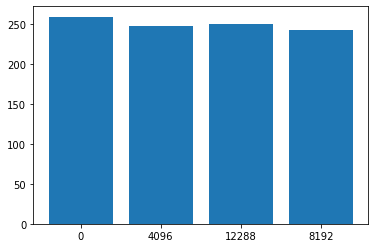

In [ ]:
import matplotlib.pyplot as plt

plt.bar([str(key) for key in results.keys()], results.values())
plt.show()

<a id="task6"></a>
<h3>Task 6</h3>

For each one of the possible outcomes in Task 5, try to find out the value of $r$ using continued fractions algorithm. You can use the functions defined above.

<h3>Solution</h3>

The outcomes are 0, 4096, 8192 and 12288.

- From 0, we don't get any meaningful result.

- Let's check $\frac{4096}{2^{14}}$.

In [7]:
%run helpers.py

In [ ]:
cf = contFrac(4096/2**14)
cv = convergents(cf)
print(cv)

The candidate is $s'=1$ and $r'=4$. Indeed 4 is the answer. Let's check the other cases as well.

In [8]:
cf = contFrac(8192/2**14)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 2)]


From 8192, we can not get the correct result. The reason is that $s=2$ and $r=4$ which are not relatively prime and as a result we get $s'=1$ and $r'=2$.

In [9]:
cf = contFrac(12288/2**14)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 1), Fraction(3, 4)]


The candidate is $s'=3$ and $r'=4$. We get the correct result.

<a id="task7"></a>
<h3>Task 7</h3>

Repeat Task 5 and Task 6 with $x$=5 and $N=42$.

<h3>Solution</h3>

In [10]:
%run operator.py

In [11]:
# %load qpe.py
import cirq
def qpe(t,control, target, circuit, CU):

    #Apply Hadamard to control qubits
    circuit.append(cirq.H.on_each(control))

    #Apply CU gates
    for i in range(t):
        #Obtain the power of CU gate
        CUi = CU**(2**i)
        #Apply CUi gate where t-i-1 is the control
        circuit.append(CUi(control[t-i-1],*target))

    #Apply inverse QFT
    iqft(t,control,circuit)


In [12]:
# %load iqft.py
import cirq
from cirq.circuits import InsertStrategy
from cirq import H, SWAP, CZPowGate

def iqft(n,qubits,circuit):

    #Swap the qubits
    for i in range(n//2):
        circuit.append(SWAP(qubits[i],qubits[n-i-1]), strategy = InsertStrategy.NEW)

    #For each qubit
    for i in range(n-1,-1,-1):
        #Apply CR_k gates where j is the control and i is the target
        k=n-i #We start with k=n-i
        for j in range(n-1,i,-1):
            #Define and apply CR_k gate
            crk = CZPowGate(exponent = -2/2**(k))
            circuit.append(crk(qubits[j],qubits[i]),strategy = InsertStrategy.NEW)
            k=k-1 #Decrement at each step

        #Apply Hadamard to the qubit
        circuit.append(H(qubits[i]),strategy = InsertStrategy.NEW)


$t$ should be picked as $2L + 1 + \big \lceil \log \big( 2 + \frac{1}{2\epsilon} \big) \big \rceil$. Let $\epsilon=0.1$. First let's find $L$.

In [13]:
import math
L=math.ceil(math.log2(42))
print(L)

6


$ L= \big \lceil  \log N \big \rceil $ = $ L= \big \lceil  \log 42 \big \rceil =6.$

In [14]:
e = 0.1
num_t = 2*L+1+math.ceil(math.log2(2+1/(2*e)))
print(num_t)

16


In [46]:
import cirq
import matplotlib

#Create a circuit
circuit = cirq.Circuit()

#Assign the size of the registers
t=num_t
n=L

#Create control and target qubits
control = [cirq.LineQubit(i) for i in range(1,t+1) ]
target = [cirq.LineQubit(i) for i in range(t+1,t+1+n) ]
circuit.append(cirq.X(target[n-1]))

#Create operator CU
x=5
N=42
CU=Ux(x,N)

#Call phase estimation circuit
qpe(t,control, target, circuit, CU)

#Measure the control register
circuit.append(cirq.measure(*control, key='result'))

#Sample the circuit
s=cirq.Simulator()
print('Sample the circuit:')
samples=s.run(circuit, repetitions=1000)

# Print a histogram of results
results= samples.histogram(key='result')
print(results)

Sample the circuit:
Counter({32768: 185, 0: 175, 21845: 115, 10923: 113, 43691: 106, 54613: 103, 54614: 33, 21846: 30, 10922: 29, 43690: 28, 21844: 11, 10924: 8, 43692: 7, 54612: 6, 43689: 6, 54615: 4, 21847: 4, 54611: 3, 21848: 2, 43693: 2, 21839: 2, 54604: 2, 10926: 2, 21842: 2, 21843: 2, 54620: 1, 43686: 1, 43705: 1, 10929: 1, 10928: 1, 10919: 1, 10933: 1, 43688: 1, 43695: 1, 43684: 1, 10925: 1, 10932: 1, 10935: 1, 10962: 1, 43703: 1, 21841: 1, 10921: 1, 10920: 1, 54619: 1, 21852: 1})


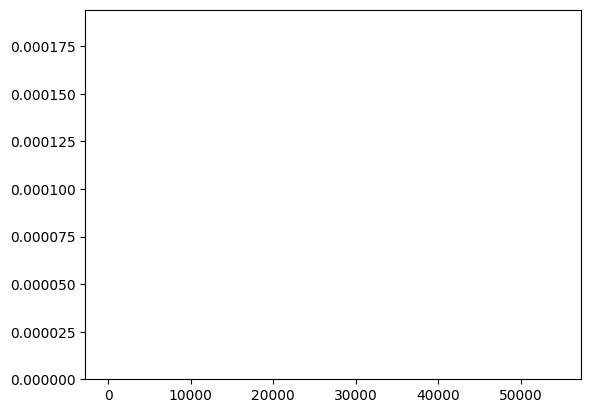

In [51]:
import matplotlib.pyplot as plt

for key in results.keys():
    results[key] /= 1000

keys = list(results.keys())
values = list(results.values())
plt.bar(keys, values)
# plt.ylim(0, 50)
plt.show()


The peaks occur at 0, 10923, 21845 32768, 43691, 54613.

- From 0, we don't get any meaningful result.

- Let's check $\frac{10923}{2^{16}}$.

In [28]:
cf = contFrac(10923/2**16)
cv = convergents(cf)
print(cv)

[Fraction(0, 1), Fraction(1, 5), Fraction(1, 6), Fraction(1, 6), Fraction(1, 6)]


The candidates are $s'=1$, $r'=5$ and $s''=1$, $r''=6$. Indeed the answer is 6.

In [ ]:
cf = contFrac(21845/2**16)
cv = convergents(cf)
print(cv)

From 21845, we can not get the correct result. The reason is that $s=2$ and $r=6$ which are not relatively prime and as a result we get $s'=1$ and $r'=3$.

In [ ]:
cf = contFrac(32768/2**16)
cv = convergents(cf)
print(cv)

From 32768, we can not get the correct result. The reason is that $s=3$ and $r=6$ which are not relatively prime and as a result we get $s'=1$ and $r'=2$.

In [ ]:
cf = contFrac(43691/2**16)
cv = convergents(cf)
print(cv)

From 43691, we can not get the correct result. The reason is that $s=4$ and $r=6$ which are not relatively prime and as a result we get $s'=2$ and $r'=3$.

In [ ]:
cf = contFrac(54613/2**16)
cv = convergents(cf)
print(cv)

The candidates are $s'=4$, $r'=5$ and $s''=5$, $r''=6$.